In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import json

In [67]:
## this file uses the outputs of PY01_DNR_Summary.py, PY02_DNR_Simbench.py, PY03_DNR_VoltageProfile.py and PY04_DNR_Pareto.py
## to create plots for the paper "Hands on....."

In [68]:
#Create a single plot with lines and two y-axes
def CreatePlot2Lines(data, varx, var1, var2, title=None, axs=None, a=0, b=0):
    # Create figure and primary axis
    sns.set_theme(style="whitegrid", palette="pastel")
    
    if (axs is None):
        fig, ax1 = plt.subplots(figsize=(8, 6))
    else:
       ax1 = axs[a,b]
    # Bar plot (primary axis - left)
    color = 'tab:blue'
    ax1.set_xlabel(varx, fontsize=10)
    ax1.set_ylabel(var1, fontsize=10, color=color)
    line = ax1.plot(data[varx], data[var1], color=color, marker='o', 
                    linewidth=2, markersize=8, label='time (s)')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create secondary axis (right)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(var2, fontsize=12, color=color)


    line = ax2.plot(data[varx], data[var2], color=color, marker='o', 
                    linewidth=2, markersize=8, label='time (s)')
    ax2.tick_params(axis='y', labelcolor=color)

    # Add title and adjust layout
    if title :
        plt.title(title, fontsize=12, pad=20)

    # Combine legends from both axes
    #lines, labels = ax1.get_legend_handles_labels()
    #lines2, labels2 = ax2.get_legend_handles_labels()
    #ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Add grid for primary axis
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

In [69]:
#Create a single plot with one bar and one line and two y-axes
def CreatePlotBarLine(data, varx, var1, var2, var1ylabel=" ", var2ylabel=" ", xlabel=" ", ylim=None, title=None, axs=None, a=0, b=0):
    # Create figure and primary axis
    sns.set_theme(style="whitegrid", palette="pastel")
    
    if (axs is None):
        fig, ax1 = plt.subplots(figsize=(8, 6))
    else:
       ax1 = axs[a,b]

    # Bar plot (primary axis - left)
    color = 'tab:blue'
    ax1.set_xlabel(xlabel, fontsize=12)
    ax1.set_ylabel(var1ylabel, fontsize=12, color=color)
    bars = ax1.bar(data[varx], data[var1], color=color, alpha=0.7, label='Losses (MW)')
    ax1.tick_params(axis='y', labelcolor=color, labelsize=8)
    ax1.tick_params(axis='x', labelsize=8)
    bar_plot = sns.barplot(
        ax=ax1,
        data=data,
        x=varx,
        y=var1,
        legend = False,
        saturation=0.8
    )
    # Add value labels on bars
    #for bar in bars:
    #    height = bar.get_height()

    # Create secondary axis (right)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(var2ylabel, fontsize=12, color=color)
    if ylim is not None:
        ax2.set_ylim(ylim)

    line = ax2.plot(data[varx], data[var2], color=color, marker='o', 
                    linewidth=2, markersize=8, label='time (s)')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=8)

    # Add title and adjust layout
    # Add title and adjust layout
    if title :
        plt.title(title, fontsize=15, pad=20)

    # Combine legends from both axes
    #lines, labels = ax1.get_legend_handles_labels()
    #lines2, labels2 = ax2.get_legend_handles_labels()
    #ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    # Add grid for primary axis
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

## load data from "results.xlsx" file generated by PY01_DNR_Summary.py

In [70]:
os.getcwd()

'd:\\15_Thesis-code\\DNRlib\\paper_results'

In [71]:
df = pd.read_excel('.\\data\\results.xlsx', sheet_name='Sheet1')

In [72]:
print('33 buses',[(row['Method'],row['Loss']) for idx,row in df.iterrows() if row['case']=='33 buses'])
print('69 buses',[(row['Method'],row['Loss']) for idx,row in df.iterrows() if row['case']=='69 buses'])
print('118 buses',[(row['Method'],row['Loss']) for idx,row in df.iterrows() if row['case']=='118 buses'])
print('1-HVMV-urban-2.203-0-no_sw',[(row['Method'],row['Loss']) for idx,row in df.iterrows() if row['case']=='1-HVMV-urban-2.203-0-no_sw'])

33 buses []
69 buses []
118 buses []
1-HVMV-urban-2.203-0-no_sw [('TieLines', 34.81720270825749), ('Merlin', 34.65978623787507), ('Baran', 34.81720270825749), ('Salkuti', 13.95547511116935), ('MSTgreedy', 5.649001656117658), ('Khalil', 6.189546944828181), ('Jakus', 6.04831722086179)]


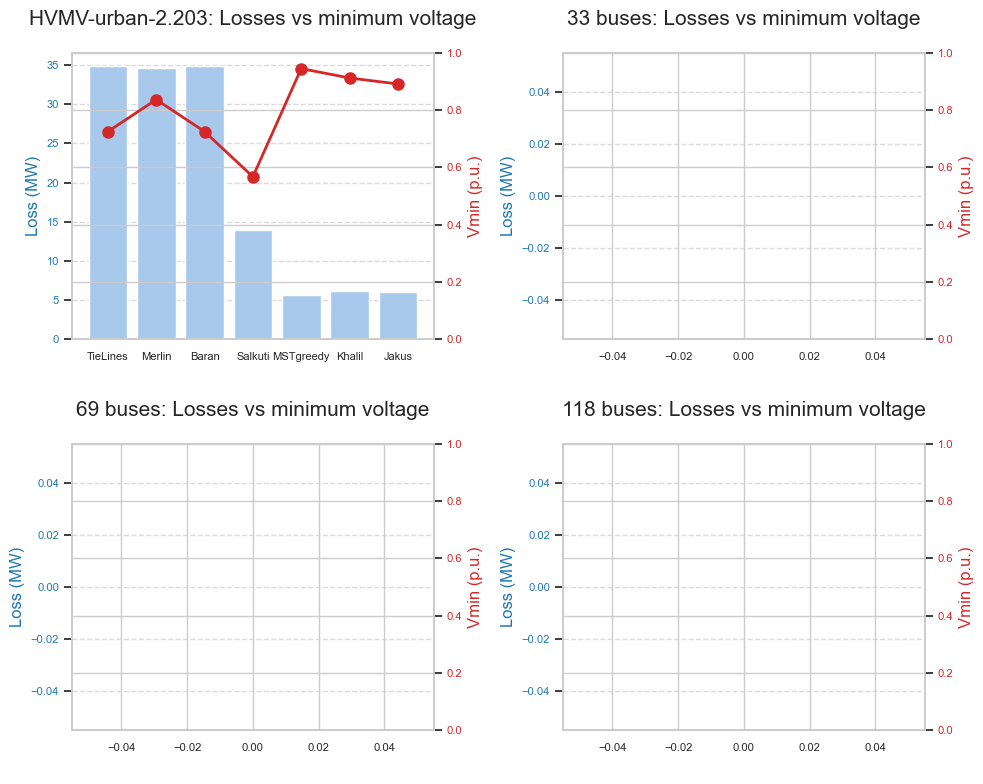

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
CreatePlotBarLine(df[df['case'] == '1-HVMV-urban-2.203-0-no_sw'].copy(), varx='Method', var1='Loss', var1ylabel='Loss (MW)', var2='vmin',var2ylabel='Vmin (p.u.)', ylim=(0, 1), title='HVMV-urban-2.203: Losses vs minimum voltage', axs=axs, a=0, b=0)
CreatePlotBarLine(df[df['case'] == '33 buses'].copy(), varx='Method', var1='Loss', var1ylabel='Loss (MW)', var2='vmin',var2ylabel='Vmin (p.u.)',  ylim=(0, 1), title='33 buses: Losses vs minimum voltage', axs=axs, a=0, b=1)
CreatePlotBarLine(df[df['case'] == '69 buses'].copy(), varx='Method', var1='Loss',var1ylabel='Loss (MW)',  var2='vmin',var2ylabel='Vmin (p.u.)',  ylim=(0, 1), title='69 buses: Losses vs minimum voltage', axs=axs, a=1, b=0)
CreatePlotBarLine(df[df['case'] == '118 buses'].copy(), varx='Method', var1='Loss',var1ylabel='Loss (MW)',  var2='vmin',var2ylabel='Vmin (p.u.)',  ylim=(0, 1), title='118 buses: Losses vs minimum voltage', axs=axs, a=1, b=1)
# Adjust layout and save
plt.tight_layout()
plt.savefig('.\\results\\Loss_Vmin_all_cases.pdf', format='pdf', bbox_inches='tight')
plt.show()


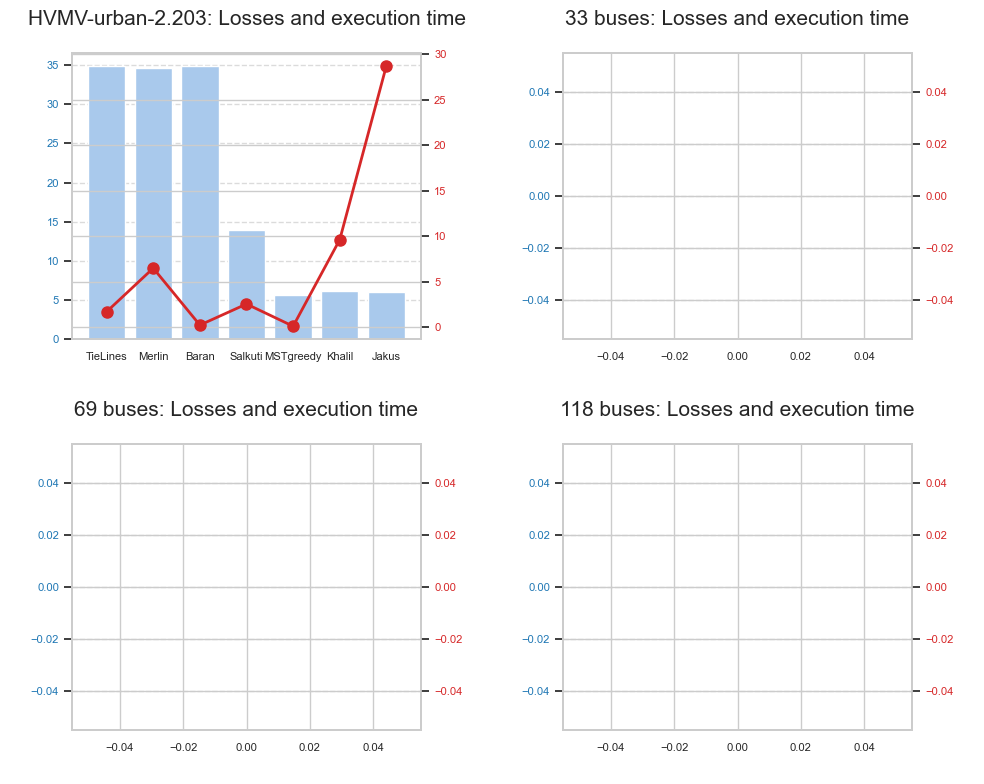

In [74]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
CreatePlotBarLine(df[df['case'] == '1-HVMV-urban-2.203-0-no_sw'].copy(), varx='Method', var1='Loss', var2='time', title='HVMV-urban-2.203: Losses and execution time', axs=axs, a=0, b=0)
CreatePlotBarLine(df[df['case'] == '33 buses'].copy(), varx='Method', var1='Loss', var2='time', title='33 buses: Losses and execution time', axs=axs, a=0, b=1)
CreatePlotBarLine(df[df['case'] == '69 buses'].copy(), varx='Method', var1='Loss', var2='time', title='69 buses: Losses and execution time', axs=axs, a=1, b=0)
CreatePlotBarLine(df[df['case'] == '118 buses'].copy(), varx='Method', var1='Loss', var2='time', title='118 buses: Losses and execution time', axs=axs, a=1, b=1)   
# Adjust layout and save
plt.tight_layout()
plt.savefig('.\\results\\mixed_bar_line_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()


################################# PARETO FRONT #######################################

load data from "results_pareto_<network>.xlsx" file generated by PY04_DNR_Pareto.py

In [75]:
# Prepares the data for Pareto plot and plots it
def ShowPareto(df_pareto, title=None):
    df_pareto['incV'] = df_pareto['vmax'] - df_pareto['vmin']
    fitness_ratios = list(set(df_pareto['fitness_ratio']))
    fitness_ratios.sort()
    cases = list(set(df_pareto['case']))
    fitness_groups = dict()

    for ratio in fitness_ratios:
        fitness_groups[ratio] = df_pareto[df_pareto['fitness_ratio'] == ratio]


    df_pareto_plot = pd.DataFrame(columns=['fitness_ratio', 'Loss', 'incV'])
    for case in cases:
        for ratio in fitness_ratios:
            CaseRatioGroup = df_pareto[(df_pareto['case'] == case) & (df_pareto['fitness_ratio'] == ratio)]
            if (len(CaseRatioGroup) > 0):
                #print(case, ratio, CaseRatioGroup['Loss'].mean(), CaseRatioGroup['Loss'].std(), CaseRatioGroup['Loss'].count(), CaseRatioGroup['Loss'].min(), CaseRatioGroup['Loss'].max())
                new_row = {
                    'fitness_ratio': ratio,
                    'Loss': CaseRatioGroup['Loss'].mean(),
                    'incV': CaseRatioGroup['incV'].mean()
                }
                df_pareto_plot = pd.concat([df_pareto_plot, pd.DataFrame([new_row])], ignore_index=True)
    
    varx='fitness_ratio'
    var1='Loss'
    var2='incV'
    data = pd.DataFrame(columns=[varx, var1, var2])
    data[varx] = df_pareto_plot[varx]
    data[var1] = df_pareto_plot[var1]
    data[var2] = df_pareto_plot[var2]
    #CreatePlot2Lines(data, varx, var1, var2, title=title)
    plt.plot(data[var1], data[var2])

    return data[var1], data[var2], data[varx]

C:\Users\ferra\AppData\Local\Temp\ipykernel_36140\614008544.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pareto_plot = pd.concat([df_pareto_plot, pd.DataFrame([new_row])], ignore_index=True)


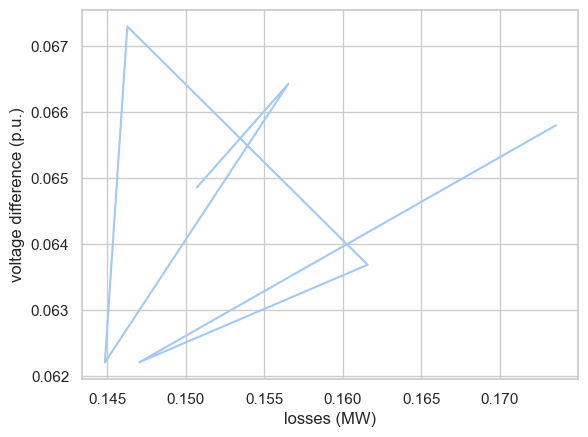

In [76]:
df_pareto = pd.read_excel('.\\data\\results_pareto_simbench.xlsx', sheet_name='Sheet1')
_,_,_ = ShowPareto(df_pareto)
plt.ylabel("voltage difference (p.u.)", fontsize=12)
plt.xlabel("losses (MW)", fontsize=12)
plt.savefig(".\\results\\pareto_simbench.pdf", format='pdf', bbox_inches='tight')
plt.show()

################################# TIME STEPS #######################################

load data from "results_simbench_timestep.json" file generated by PY02_DNR_Simbench.py

In [77]:
def CreatePlotSimbench(a,b,axs, data, var1, var2):

    reduction = round((data[var1].sum()-data[var2].sum())/data[var1].sum()*100,3)
#    print(f"Losses with config {var1} = {data[var1][2:].sum():.3f} MW")
#    print(f"Losses with config {var2} = {data[var2][2:].sum():.3f} MW")
#    print(f"Losses reduction {var1} vs {var2} = {reduction:.2f} %")

    maxVal1 = data[var1].max()
    minVal1 = data[var1].min()
    maxVal2 = data[var2].max()
    minVal2 = data[var2].min()
    minVal = minVal1 if minVal1 < minVal2 else minVal2
    maxVal = maxVal1 if maxVal1 > maxVal2 else maxVal2
    
    # Bar plot (primary axis - left)
    color = 'tab:blue'
    ax1 = axs[a,b]
    line = ax1.plot(data[var1], color=color, marker='o', linewidth=1, markersize=2)
    ax1.set_xlabel('step', fontsize=8)
    ax1.set_ylabel(var1, fontsize=8, color=color)
    ax1.tick_params(axis='x', labelsize=6, size=6, labelcolor=color, pad=5)
    ax1.tick_params(axis='y', labelsize=6, size=6, labelcolor=color)
    ax1.set_xticks([])
    ax1.set_yticks([])


    # Create secondary axis (right)
    color = 'tab:red'
    ax2 = ax1.twinx()
    line = ax2.plot(data[var2], color=color, marker='o', linewidth=1, markersize=2)
    ax2.set_ylabel(var2, fontsize=8, color=color)
    ax2.tick_params(axis='x', labelsize=6, size=6, labelcolor=color, pad=5)
    ax2.tick_params(axis='y', labelsize=6, size=6, labelcolor=color)
    ax2.set_xticks([])
    ax2.set_yticks([])

    # Add title and adjust layout
    plt.title('Initial configuration vs '+var2+' = '+str(reduction)+'%', fontsize=10, pad=5)

    ax1.set_ylim((0.9*minVal,1.1*maxVal))
    ax2.set_ylim((0.9*minVal,1.1*maxVal))
    #ax2.set_ylim((1.1*maxVal,0.9*minVal))

    # Add grid for primary axis
    plt.xticks([])
    plt.yticks([])
    #ax1.grid(axis='y', linestyle='--', alpha=0.7)

In [78]:
def load_dict(filename):
    with open(filename, 'r') as f:
        return json.load(f)

In [79]:
#simbench_sim = load_dict('D:\\15_Thesis-code\\DistributionNetwork_libraries\\DistributionNetworkReconfiguration\\examples\\results_Simbech_timestep.json')
simbench_sim = load_dict('D:\\results_Simbech_timestep.json')
first_key = next(iter(simbench_sim))
methods = simbench_sim[first_key].keys()
simbench_sim_pd = pd.DataFrame.from_dict(simbench_sim, orient='index', columns=methods)
for method in list(methods)[1:12]:
    simbench_sim_pd[method+'_loss'] = simbench_sim_pd[method].apply(lambda x: x[0])
    simbench_sim_pd[method+'_radial'] = simbench_sim_pd[method].apply(lambda x: x[1][0])
    simbench_sim_pd = simbench_sim_pd.drop(method, axis=1)

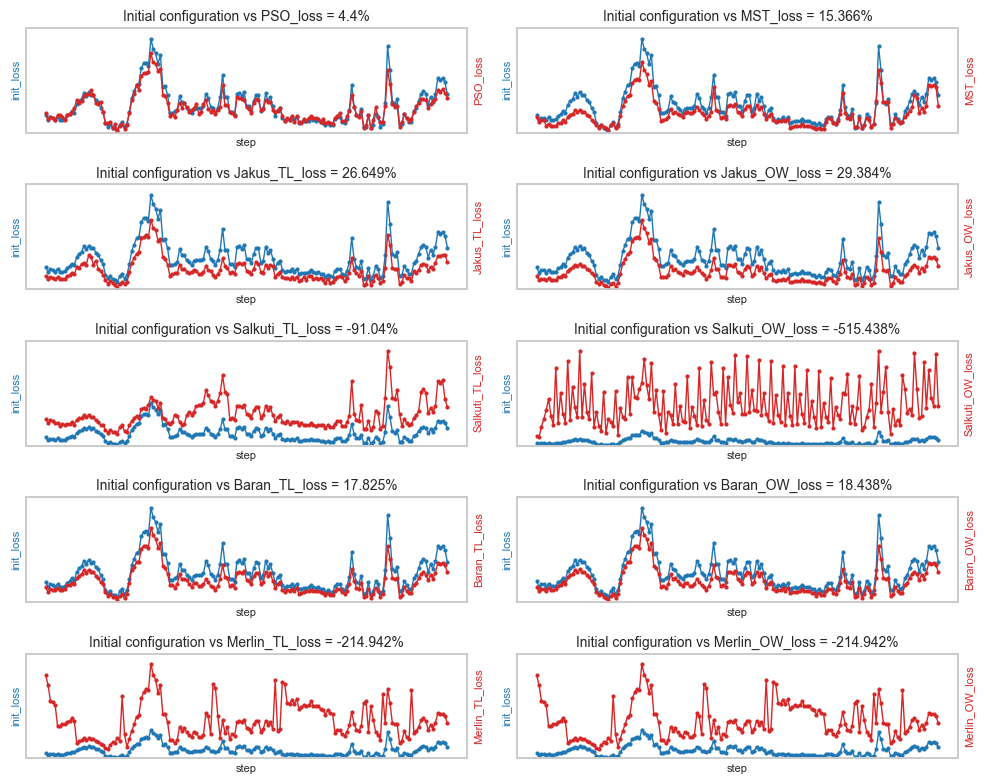

In [81]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 8))
CreatePlotSimbench(0,0,axs,simbench_sim_pd, var1='init_loss', var2='PSO_loss')
CreatePlotSimbench(0,1,axs,simbench_sim_pd, var1='init_loss', var2='MST_loss')

CreatePlotSimbench(1,0,axs,simbench_sim_pd, var1='init_loss', var2='Jakus_TL_loss')
CreatePlotSimbench(1,1,axs,simbench_sim_pd, var1='init_loss', var2='Jakus_OW_loss')

CreatePlotSimbench(2,0,axs,simbench_sim_pd, var1='init_loss', var2='Salkuti_TL_loss')
CreatePlotSimbench(2,1,axs,simbench_sim_pd, var1='init_loss', var2='Salkuti_OW_loss')

CreatePlotSimbench(3,0,axs,simbench_sim_pd, var1='init_loss', var2='Baran_TL_loss')
CreatePlotSimbench(3,1,axs,simbench_sim_pd, var1='init_loss', var2='Baran_OW_loss')

CreatePlotSimbench(4,0,axs,simbench_sim_pd, var1='init_loss', var2='Merlin_TL_loss')
CreatePlotSimbench(4,1,axs,simbench_sim_pd, var1='init_loss', var2='Merlin_OW_loss')

# Adjust layout and save
plt.tight_layout()
plt.savefig(".\\results\\Simbench_timeseries.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [82]:
from collections import Counter

print(f"the period contains {len(simbench_sim_pd)} steps")
# Flatten the list of lists and count occurrences
solutions = ['Jakus_TL_Solultion',
 'Jakus_OW_Solultion',
 'Salkuti_TL_Solultion',
 'Salkuti_OW_Solultion',
 'Baran_TL_Solultion',
 'Baran_OW_Solultion',
 'Merlin_TL_Solultion',
 'Merlin_OW_Solultion']

for solution in solutions:
    all_elements = [item for sublist in simbench_sim_pd[solution] for item in sublist]
    element_counts = Counter(all_elements)
    sorted_counts = element_counts.most_common()
    print(solution, [count for element,count in sorted_counts])

the period contains 169 steps
Jakus_TL_Solultion [169, 169, 161, 145, 126, 121, 98, 80, 75, 62, 61, 57, 56, 49, 44, 42, 41, 41, 39, 38, 37, 35, 34, 33, 31, 30, 29, 28, 28, 27, 26, 25, 24, 21, 18, 18, 17, 16, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Jakus_OW_Solultion [169, 169, 168, 161, 149, 146, 138, 130, 108, 94, 72, 72, 71, 53, 39, 37, 37, 35, 32, 30, 29, 29, 26, 25, 24, 24, 24, 23, 23, 23, 23, 22, 21, 20, 20, 20, 20, 20, 19, 19, 18, 17, 17, 16, 15, 15, 15, 15, 15, 15, 14, 14, 13, 12, 12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


################################# Voltage profiles #######################################

load data from "results_voltage_profile.xlsx" file generated by PY03_DNR_VoltageProfile.py

In [85]:
df_voltage_profile = pd.read_excel('.\\data\\results_voltage_profile.xlsx', sheet_name='Sheet1')
fitness_ratios = list(set(df_voltage_profile['fitness_ratio']))
fitness_ratios.sort()
cases = list(set(df_voltage_profile['case']))
fitness_groups = dict()

for ratio in fitness_ratios:
    fitness_groups[ratio] = df_voltage_profile[df_voltage_profile['fitness_ratio'] == ratio]


print("cases", cases)
print("fitness_ratios", fitness_ratios)

cases ['118 buses']
fitness_ratios [1]


In [86]:
df_voltage_profile

,Unnamed: 0,case,Method,parameters,Loss,Vprofile,time,fitness_ratio,Radiality,NumPF,DisabledLines
0,original 118 buses,118 buses,TieLines,['TieLines'],496.785292,1 0.955000\n2 0.981069\n3 0.964295...,1.771173,1,"(True, True, True)",0,"['1_2_1', '4_5_1', '3_12_1', '7_12_1', '13_15_..."
1,Merlin118 buses,118 buses,Merlin,['TieLines'],5691.864502,1 0.955000\n2 0.990712\n3 0.995970...,6.768874,1,"(False, True, False)",119,"['7647a516f603428b94b573c689194938', '6ef7c8bd..."
2,Baran118 buses,118 buses,Baran,['TieLines'],496.785292,1 0.955000\n2 0.981069\n3 0.964295...,0.254770,1,"(True, True, True)",3,"['7647a516f603428b94b573c689194938', '2b29779c..."
3,Salkuti118 buses,118 buses,Salkuti,['TieLines'],613.267533,1 0.955000\n2 0.970894\n3 0.956767...,7.393922,1,"(True, True, True)",143,"['f56316c48e994c2f81496eb7e1a548df', 'ecf781ef..."
4,Montaya/MSTgreedy118 buses,118 buses,MSTgreedy,"[False, False, True, 'prim']",496.785292,1 0.955000\n2 0.981069\n3 0.964295...,0.070836,1,"(True, True, True)",1,"['7647a516f603428b94b573c689194938', '2b29779c..."
5,Jakus118 buses1,118 buses,Jakus,"[0.4, 16, 20, 2, 'TieLines', 1, 0.02]",226.202052,1 0.955666\n2 0.980950\n3 0.964801...,16.994093,1,"(True, True, True)",298,"['7647a516f603428b94b573c689194938', '2b29779c..."


C:\Users\ferra\AppData\Local\Temp\ipykernel_36140\1809947680.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


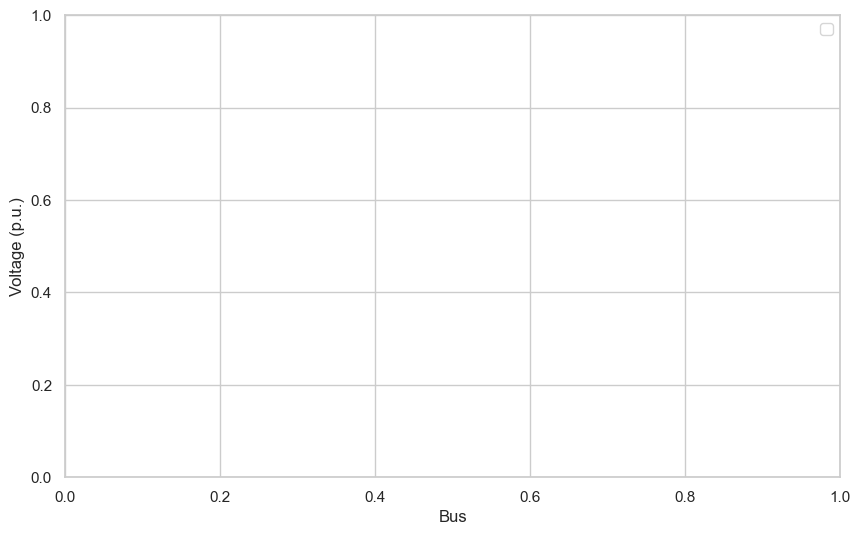

In [87]:
df_33 = df_voltage_profile[df_voltage_profile['case'] == '33 buses'].copy()
sns.set_theme(style="whitegrid", palette="bright")
fig = plt.subplots(figsize=(10, 6))
for row in df_33.iterrows():
    text = row[1]['Vprofile']
    # Method 1: Using split() and list comprehension
    values = [float(line.split()[1]) for line in text.split('\n') if line.strip() and not line.startswith('Name:')]
    plt.plot(values, label=row[1]['Method'])
plt.legend(loc='upper right')
plt.xlabel('Bus', fontsize=12)
plt.ylabel('Voltage (p.u.)', fontsize=12)
plt.savefig(".\\results\\33buses_voltage_profile.pdf", format='pdf', bbox_inches='tight')
plt.show()



C:\Users\ferra\AppData\Local\Temp\ipykernel_36140\4103356591.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


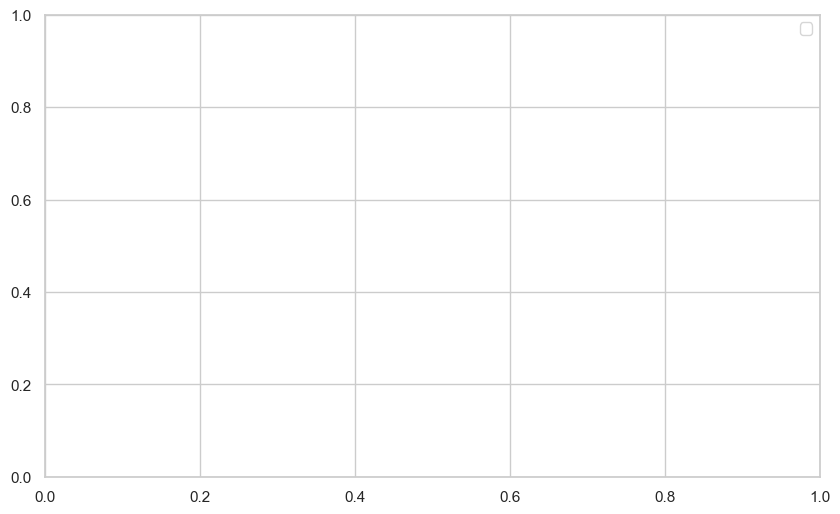

In [88]:
df_33 = df_voltage_profile[df_voltage_profile['case'] == '16 buses'].copy()
fig = plt.subplots(figsize=(10, 6))
for row in df_33.iterrows():
    text = row[1]['Vprofile']
    # Method 1: Using split() and list comprehension
    values = [float(line.split()[1]) for line in text.split('\n') if line.strip() and not line.startswith('Name:')]
    plt.plot(values, label=row[1]['Method'])
plt.legend(loc='upper right')
plt.show()

C:\Users\ferra\AppData\Local\Temp\ipykernel_36140\4286700144.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


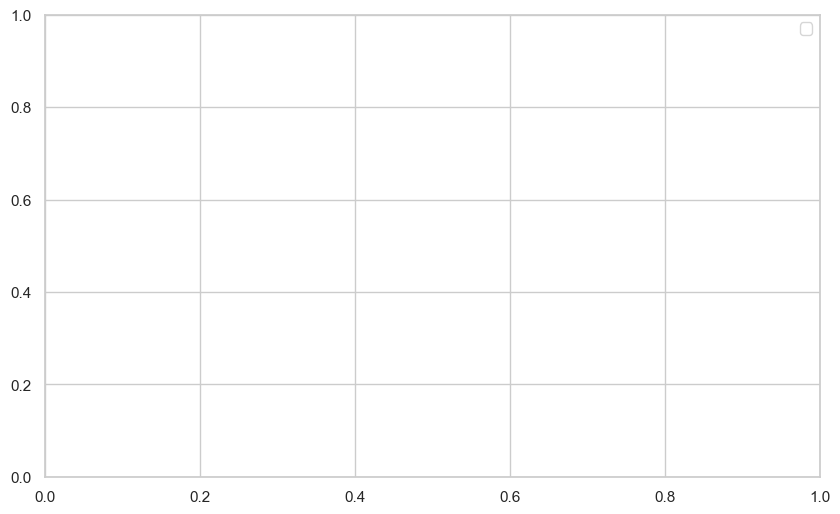

In [89]:
df_33 = df_voltage_profile[df_voltage_profile['case'] == '69 buses'].copy()
fig = plt.subplots(figsize=(10, 6))
for row in df_33.iterrows():
    text = row[1]['Vprofile']
    # Method 1: Using split() and list comprehension
    values = [float(line.split()[2]) for line in text.split('\n') if line.strip() and not line.startswith('Name:')]
    plt.plot(values, label=row[1]['Method'])
plt.legend(loc='upper right')
plt.show()

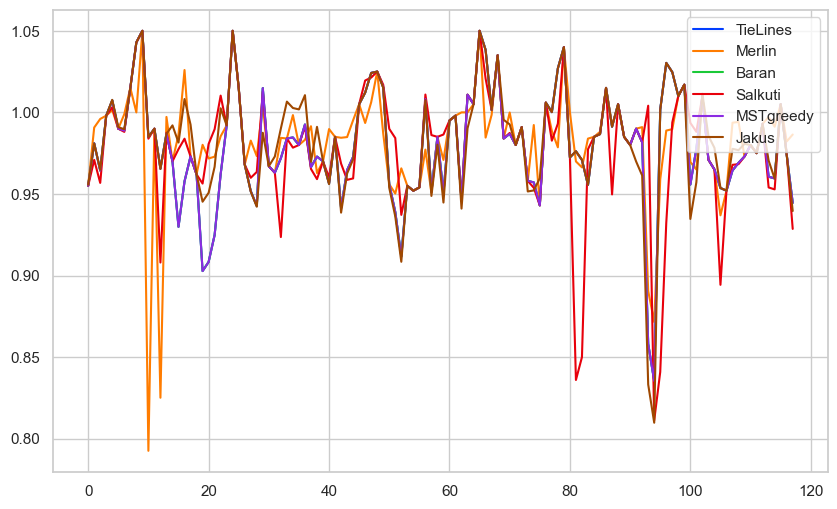

In [90]:
df_33 = df_voltage_profile[df_voltage_profile['case'] == '118 buses'].copy()
fig = plt.subplots(figsize=(10, 6))
for row in df_33.iterrows():
    text = row[1]['Vprofile']
    # Method 1: Using split() and list comprehension
    values = [float(line.split()[1]) for line in text.split('\n') if line.strip() and not line.startswith('Name:')]
    plt.plot(values, label=row[1]['Method'])
plt.legend(loc='upper right')
plt.show()

C:\Users\ferra\AppData\Local\Temp\ipykernel_36140\860158421.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


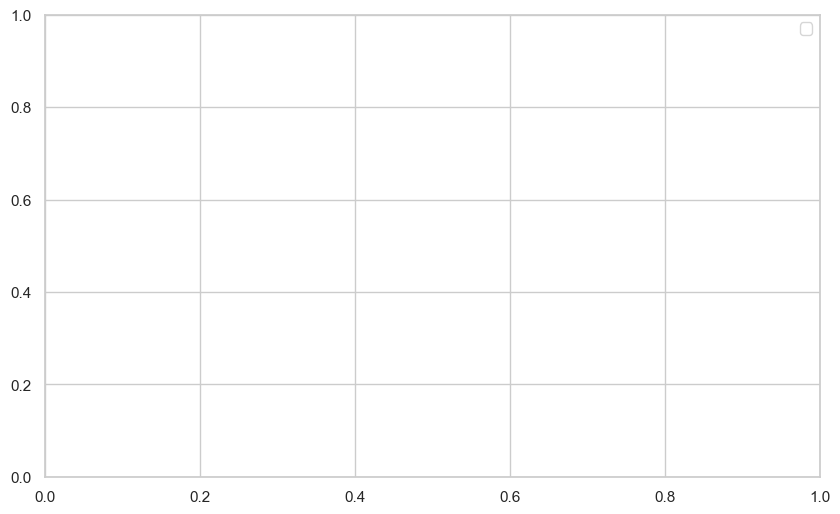

In [91]:
df_33 = df_voltage_profile[df_voltage_profile['case'] == '1-HVMV-urban-2.203-0-no_sw'].copy()
fig = plt.subplots(figsize=(10, 6))
for row in df_33.iterrows():
    text = row[1]['Vprofile']
    # Method 1: Using split() and list comprehension
    values = [float(line.split()[1]) for line in text.split('\n') if line.strip() and not line.startswith('Name:')]
    plt.plot(values, label=row[1]['Method'])
plt.legend(loc='upper right')
plt.show()